In [2]:
from scipy import stats as ss

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['figure.figsize']  = (18, 10)
plt.rcParams['axes.labelsize']  = 20
plt.rcParams['axes.titlesize']  = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['lines.linewidth'] = 4

plt.ion()
plt.style.use('seaborn-colorblind')
plt.rcParams['figure.figsize']  = (12, 8)

def despine(ax=None):
    if ax is None:
        ax = plt.gca()
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

import re

segments = []
points = []

lat_long_regex = r"<point lat=\"(.*)\" lng=\"(.*)\""

with open("/content/states.txt", "r") as f:
    lines = [line for line in f]

for line in lines:
    if line.startswith("</state>"):
        for p1, p2 in zip(points, points[1:]):
            segments.append((p1, p2))
        points = []
    s = re.search(lat_long_regex, line)
    if s:
        lat, lon = s.groups()
        points.append((float(lon), float(lat)))

def plot_state_borders():
    for (lon1, lat1), (lon2, lat2) in segments:
        plt.plot([lon1, lon2], [lat1, lat2], lw=2, color='k')

In [3]:
import json
with open('proglanguages.json') as json_file:  
    data = json.load(json_file)
data[:5]
# Observe como é lat, lon e lang.

[[[-86.75, 33.5666666666667], 'Python'],
 [[-88.25, 30.6833333333333], 'Python'],
 [[-112.016666666667, 33.4333333333333], 'Java'],
 [[-110.933333333333, 32.1166666666667], 'Java'],
 [[-92.2333333333333, 34.7333333333333], 'R']]

In [4]:
from collections import Counter

def majority_vote(labels):
    """assumes that labels are ordered from nearest to farthest"""
    vote_counts = Counter(labels)
    winner, winner_count = vote_counts.most_common(1)[0]
    num_winners = len([count
                       for count in vote_counts.values()
                       if count == winner_count])

    if num_winners == 1:
        return winner                     # unique winner, so return it
    else:
        return majority_vote(labels[:-1]) # try again without the farthest


from scipy.spatial import distance

def knn_classify(k, labeled_points, new_point):
    """each labeled point should be a pair (point, label)"""

    # order the labeled points from nearest to farthest
    by_distance = sorted(labeled_points,
                         key=lambda point_label: distance.euclidean(point_label[0], new_point))

    # find the labels for the k closest
    k_nearest_labels = [label for _, label in by_distance[:k]]

    # and let them vote
    return majority_vote(k_nearest_labels)

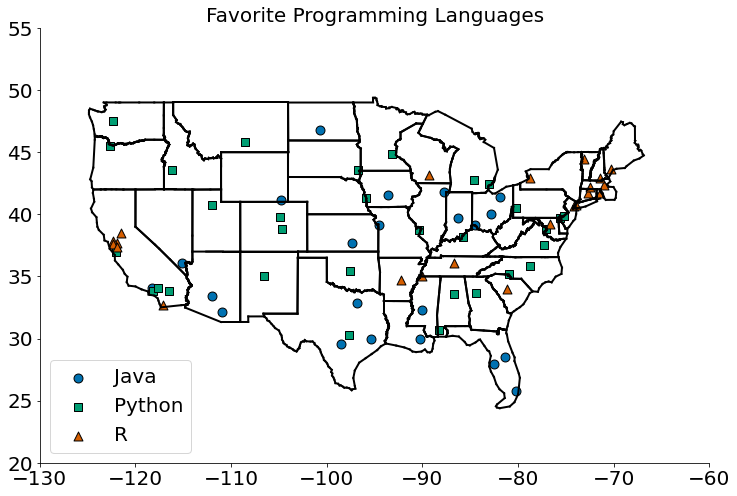

In [5]:
plots = { "Java" : ([], []), "Python" : ([], []), "R" : ([], []) }
markers = { "Java" : "o", "Python" : "s", "R" : "^" }

for (longitude, latitude), language in data:
    plots[language][0].append(longitude)
    plots[language][1].append(latitude)

plot_state_borders()
for language, (x, y) in plots.items():
    plt.scatter(x, y, label=language, s=80, edgecolors='k',
                marker=markers[language])

plt.legend(loc=0)          # let matplotlib choose the location
plt.axis([-130,-60,20,55]) # set the axes
plt.title("Favorite Programming Languages")
despine()
plt.show()

In [7]:
# try several different values for k
for k in [1, 3, 5, 7]:
    num_correct = 0
    
    for city in data:
        location, actual_language = city
        other_cities = [other_city
                        for other_city in data
                        if other_city != city]
        
        predicted_language = knn_classify(k, other_cities, location)
    
        if predicted_language == actual_language:
            num_correct += 1
    
    print(k, "neighbor[s]:", num_correct, "correct out of", len(data))

1 neighbor[s]: 40 correct out of 75
3 neighbor[s]: 44 correct out of 75
5 neighbor[s]: 41 correct out of 75
7 neighbor[s]: 35 correct out of 75


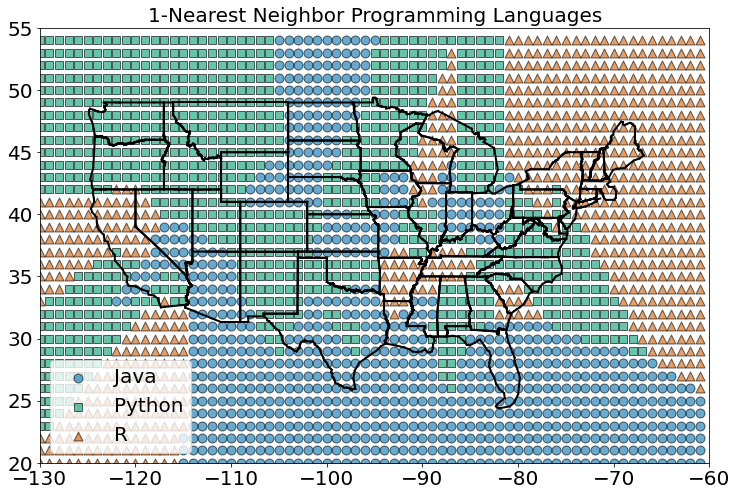

In [9]:
def classify_and_plot_grid(k=1):
    plots = { "Java" : ([], []), "Python" : ([], []), "R" : ([], []) }
    markers = { "Java" : "o", "Python" : "s", "R" : "^" }
    colors  = { "Java" : "r", "Python" : "b", "R" : "g" }

    for longitude in range(-130, -60):
        for latitude in range(20, 55):
            predicted_language = knn_classify(k, data, [longitude, latitude])
            plots[predicted_language][0].append(longitude)
            plots[predicted_language][1].append(latitude)
    plot_state_borders()
    for language, (x, y) in plots.items():
        plt.scatter(x, y, label=language, s=80, edgecolors='k',
                    marker=markers[language], alpha=.6)

    plt.legend(loc=0)          # let matplotlib choose the location
    plt.axis([-130,-60,20,55]) # set the axes
    plt.title(str(k) + "-Nearest Neighbor Programming Languages")
    plt.show()

classify_and_plot_grid()

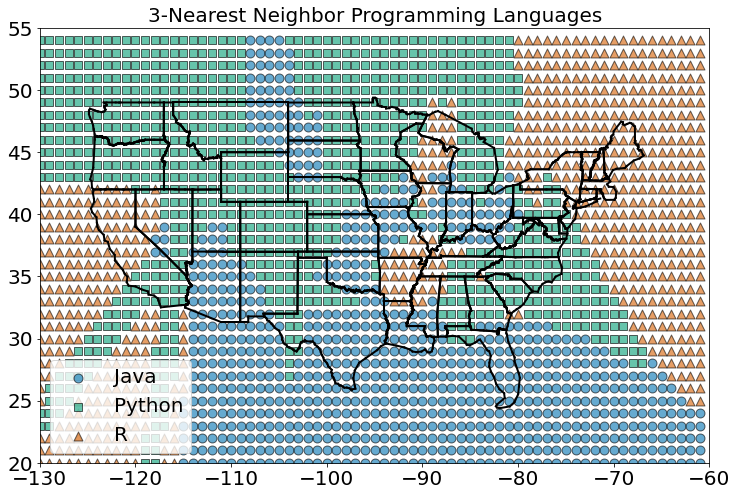

In [12]:
classify_and_plot_grid(3)

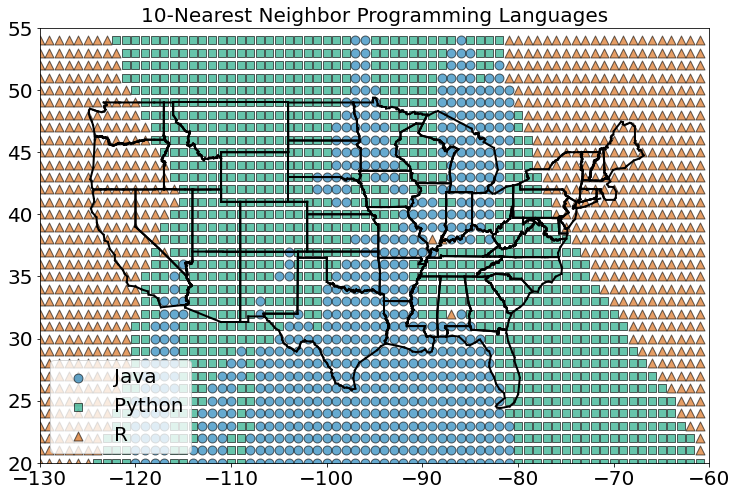

In [13]:
classify_and_plot_grid(10)